In [19]:
import pandas as pd
import numpy as np
import os
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm, mode, norm, skew, kurtosis


Q1. Download the daily closing stock prices for - Apple, IBM, Microsoft and Visa for the time period 2001-2023 from yahoo finance in python. Check their stock symbols on google or yahoo finance. There are multiple ways to do this and google provides with multiple scripts to do the same. Get the data in the format where each column indicates the adjusted closing price of a stock.

See end of notebook [Intro_to_Pandas.ipynb](https://drive.google.com/file/d/1FQybcdhmTqB3Hfhug72_bhHM6ObGp138/view?usp=sharing) for code to download data from yahoo finance.

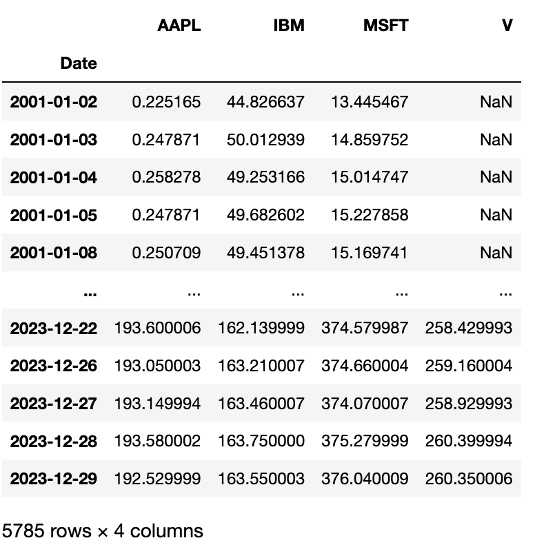

In [37]:
## Pull data from the following stocks and save the 'Close' in a pandas df
stocks = ["AAPL", "IBM", "MSFT",  "V"]

start_date = "2001-01-01"
end_date = "2023-12-31"

# Downloading stock data
stock_data = {}
for stock in stocks:
    ticker = yf.Ticker(stock)
    data = ticker.history(start=start_date, end=end_date)
    stock_data[stock] = data

######Save the adjusted closing prices in a data frame


In [38]:
df=pd.concat([stock_data[stocks[0]][['Close']],stock_data[stocks[1]][['Close']],stock_data[stocks[2]][['Close']]], axis=1)

df.columns=[stocks[0],stocks[1],stocks[2]]

df

,AAPL,IBM,MSFT
Date,,,
2001-01-02 00:00:00-05:00,0.224878,44.421650,13.445459
2001-01-03 00:00:00-05:00,0.247555,49.561092,14.859752
2001-01-04 00:00:00-05:00,0.257949,48.808159,15.014748
2001-01-05 00:00:00-05:00,0.247555,49.233749,15.227861
2001-01-08 00:00:00-05:00,0.250389,49.004589,15.169738
...,...,...,...
2023-12-22 00:00:00-05:00,193.353287,160.675140,374.579987
2023-12-26 00:00:00-05:00,192.803986,161.735489,374.660004
2023-12-27 00:00:00-05:00,192.903839,161.983231,374.070007


Q2. Compute log returns for each stock. functions. Log returns are typically calculated using the formula:
Log Return=ln (Price(t)/Price(t−1)),
where Price(t) the price at time t and Price (t−1) the price at the previous time period. The dataset should look like the following (You can match your answers):
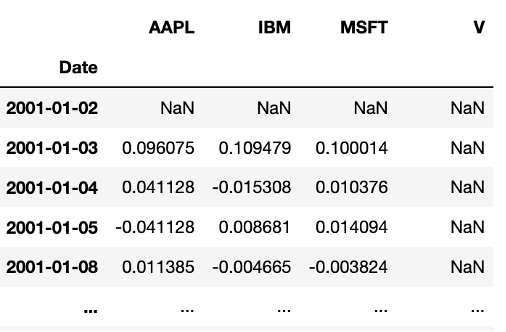

In [39]:
import math
df_log_returns = df.pct_change().apply(lambda x: pd.Series(x).apply(lambda y: round((1 + y), 6)).apply(lambda z: round((math.log(z)), 6)))
df_log_returns

,AAPL,IBM,MSFT
Date,,,
2001-01-02 00:00:00-05:00,NaN,NaN,NaN
2001-01-03 00:00:00-05:00,0.096074,0.109479,0.100015
2001-01-04 00:00:00-05:00,0.041128,-0.015309,0.010377
2001-01-05 00:00:00-05:00,-0.041127,0.008682,0.014094
2001-01-08 00:00:00-05:00,0.011385,-0.004666,-0.003824
...,...,...,...
2023-12-22 00:00:00-05:00,-0.005562,0.008423,0.002780
2023-12-26 00:00:00-05:00,-0.002845,0.006577,0.000214
2023-12-27 00:00:00-05:00,0.000518,0.001531,-0.001576


Q3. Compute the time series plots of the stocks; (b) Compute the time series plots of the returns.
The plots should look roughly like this. Read about time series stationarity and make a comment on both plots.
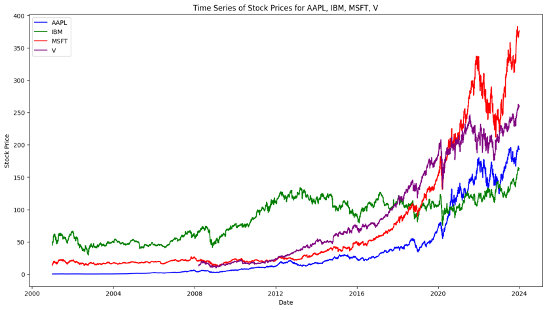

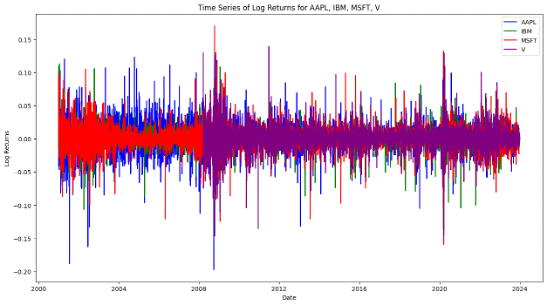

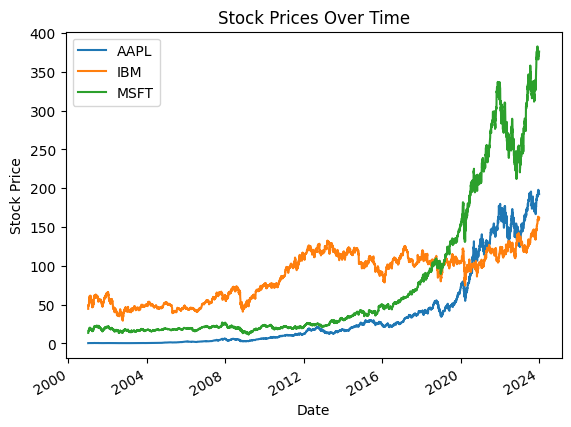

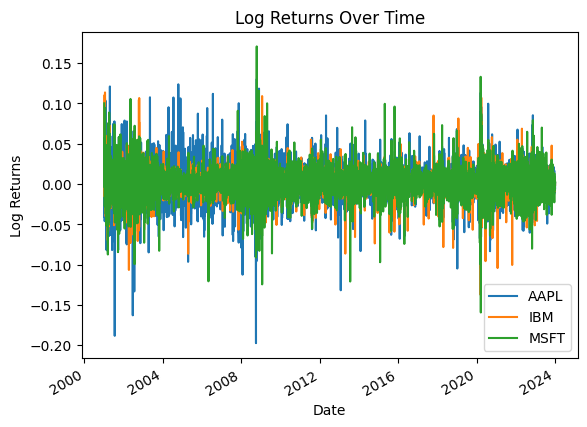

In [40]:
# Plot time series for stocks
df.plot(title='Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

# Plot time series for log returns
df_log_returns.plot(title='Log Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.show()

Q4. Compute their descriptive statistics. Also compute the mean, median, mode, skewness and kurtosis. You can arrange in the table like following.

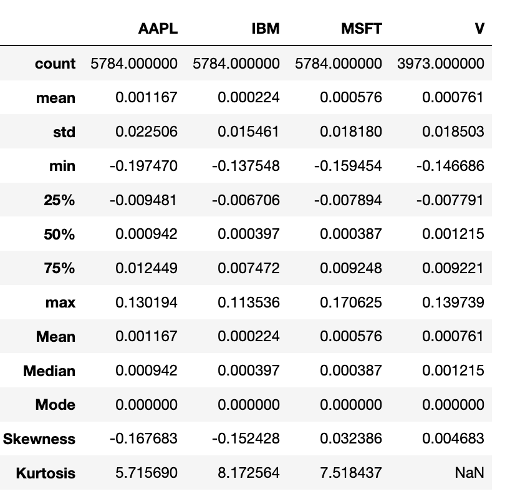

In [41]:
# Summary statistics
descriptive_stats = df.describe()

mean_prices = df.mean()
median_prices = df.median()
mode_prices = df.mode().iloc[0]

skewness = df.apply(skew)
kurt = df.apply(kurtosis)

print("Descriptive Statistics:")
print(descriptive_stats)
print("\nMean Prices:")
print(mean_prices)
print("\nMedian Prices:")
print(median_prices)
print("\nMode Prices:")
print(mode_prices)
print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurt)

Descriptive Statistics:
              AAPL          IBM         MSFT
count  5785.000000  5785.000000  5785.000000
mean     35.982970    86.645449    74.153472
std      51.377046    30.674751    91.739162
min       0.198346    29.144920    11.304621
25%       2.327544    54.226086    18.987022
50%      13.894361    97.294098    23.966581
75%      40.878754   112.470306    87.985901
max     197.857529   163.221939   382.700012

Mean Prices:
AAPL    35.982970
IBM     86.645449
MSFT    74.153472
dtype: float64

Median Prices:
AAPL    13.894361
IBM     97.294098
MSFT    23.966581
dtype: float64

Mode Prices:
AAPL      0.224500
IBM     101.202026
MSFT     16.324152
Name: 0, dtype: float64

Skewness:
AAPL    1.700584
IBM    -0.120692
MSFT    1.684505
dtype: float64

Kurtosis:
AAPL    1.588184
IBM    -1.354689
MSFT    1.530497
dtype: float64


Q5. Plot histograms for each stock. In the same plot, identify, mean, median and mode with 100 buckets. They should roughly look like the following. Comment on the plots and on the difference in the mean, median and mode.

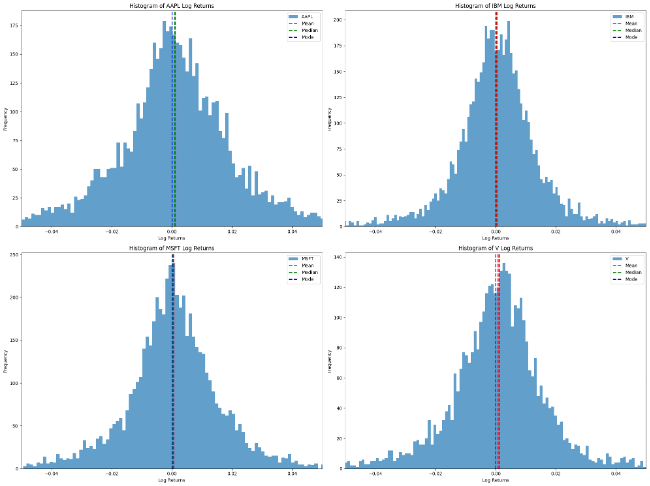

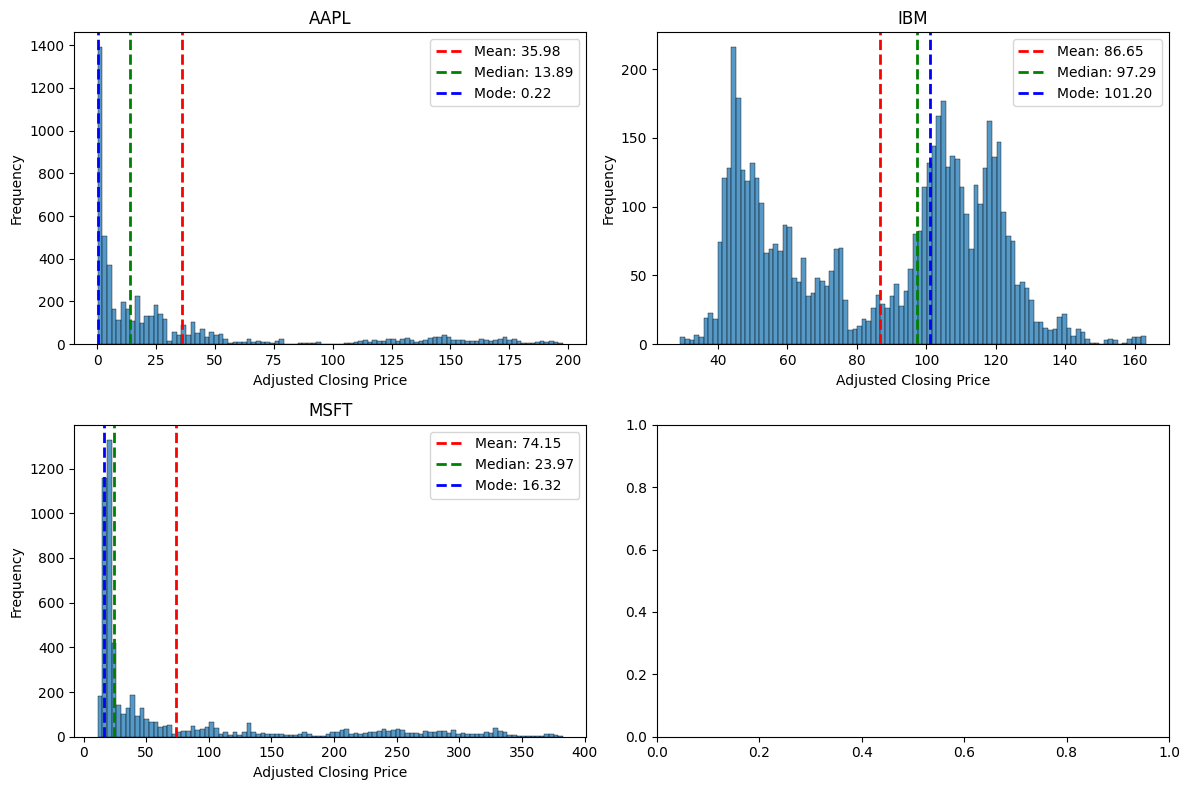

In [44]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Plot histograms for each stock
for i, column in enumerate(df.columns):
    sns.histplot(df[column], bins=100, kde=False, ax=axes[i])

    # Identify mean, median, and mode
    mean_val = df[column].mean()
    median_val = df[column].median()

    # Check if mode exists
    mode_data = df[column].mode()
    mode_val = mode_data.iloc[0] if not mode_data.empty else None

    # Display vertical lines for mean, median, and mode
    axes[i].axvline(mean_val, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_val:.2f}')

    if mode_val is not None:
        axes[i].axvline(mode_val, color='b', linestyle='dashed', linewidth=2, label=f'Mode: {mode_val:.2f}')

    # Set plot labels and legend
    axes[i].set_title(column)
    axes[i].set_xlabel('Adjusted Closing Price')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The mean median and mode varies in location for all of them. The Visa ticker is unable to load properly by the Apple and Microsoft histograms show the lines skewed to left of the graph. The mode is located to the left of the mean for these graphs along with the median. The central tendency values of IBM are located towards more the center of the distribution with median and mode values to the right of the mean.

Q6. Compute annual mean returns for each firm (addition of all daily log returns for a year). Plot time varying means per year for all the stocks. They should roughly look like the following. Write the observations.
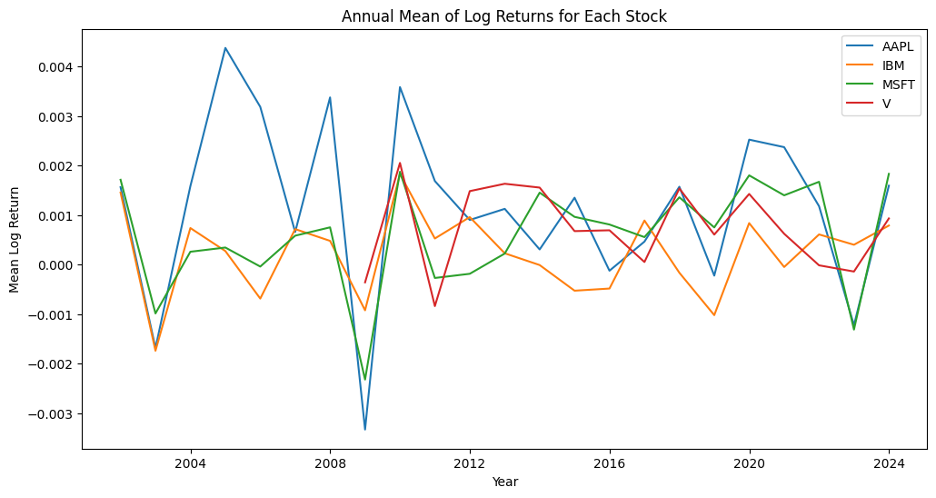![image.png](attachment:image.png)

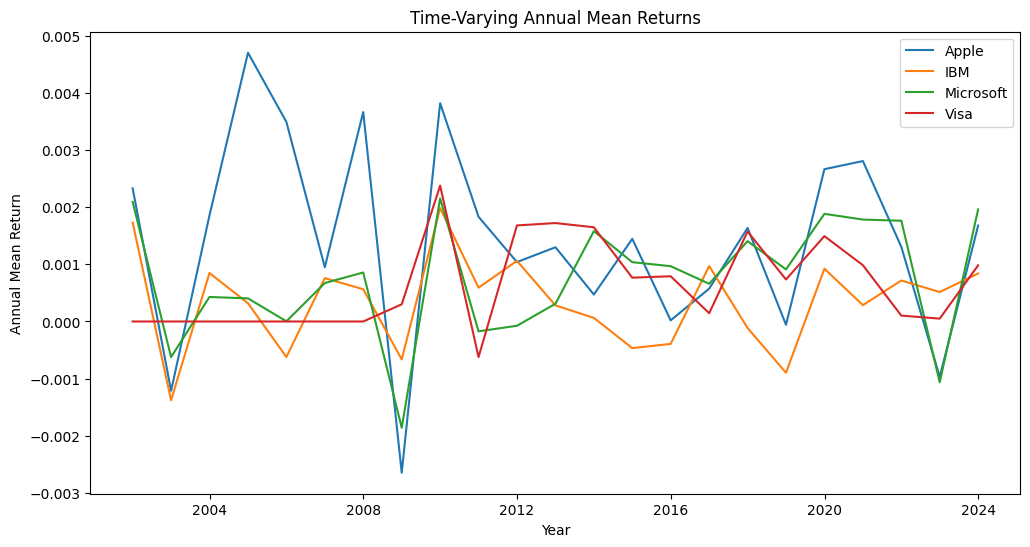

In [47]:
stocks = {'AAPL': 'Apple', 'IBM': 'IBM', 'MSFT': 'Microsoft', 'V': 'Visa'}
start_date = "2001-01-01"
end_date = "2023-12-31"

# Downloading stock data
stock_data = {}
for ticker, company_name in stocks.items():
    try:
        stock = yf.Ticker(ticker)
        data = stock.history(start=start_date, end=end_date)
        stock_data[company_name] = data['Close']
    except Exception as e:
        print(f"Error fetching data for {company_name}: {e}")

df = pd.DataFrame(stock_data)

log_returns = df.pct_change().apply(lambda x: pd.Series(x).apply(lambda x: 0 if pd.isna(x) else x))

annual_mean_returns = log_returns.resample('Y').mean()

plt.figure(figsize=(12, 6))
for column in annual_mean_returns.columns:
    sns.lineplot(data=annual_mean_returns[column], label=column)

plt.title('Time-Varying Annual Mean Returns')
plt.xlabel('Year')
plt.ylabel('Annual Mean Return')
plt.legend()
plt.show()


The close prices vary greatly with the apple values reaching its peak around 2005 and reaching a minimum at around 2009. Out of the four, it holds the highest and lowest annual mean return values. IBM, Microsoft and Visa all seem to peak at the same point around 2010.

Q7. There are three datasets: Dataset1, Dataset2 and Dataset3. Each dataset has two columns 'a' and 'b'. Compute the summary statistics, create a histogram, and discuss their observations for each of the three datasets.

Summary Statistics for Dataset1:

          Unnamed: 0             a              b
count  100000.000000  100000.00000  100000.000000
mean    49999.500000       9.99558      10.042907
std     28867.657797       2.00294      82.095863
min         0.000000      -0.01000       0.000000
25%     24999.750000       8.64000       0.240000
50%     49999.500000      10.00000       0.990000
75%     74999.250000      11.35000       4.220000
max     99999.000000      18.53000    8952.960000


Summary Statistics for Dataset2:

          Unnamed: 0              a              b
count  100000.000000  100000.000000  100000.000000
mean    49999.500000      10.042174      10.042907
std     28867.657797      79.223690      82.095863
min         0.000000       0.000000       0.000000
25%     24999.750000       0.230000       0.240000
50%     49999.500000       1.000000       0.990000
75%     74999.250000       4.290000       4.220000
max     99999.000000    9719.440000    8952.960000


Summary Statistics 

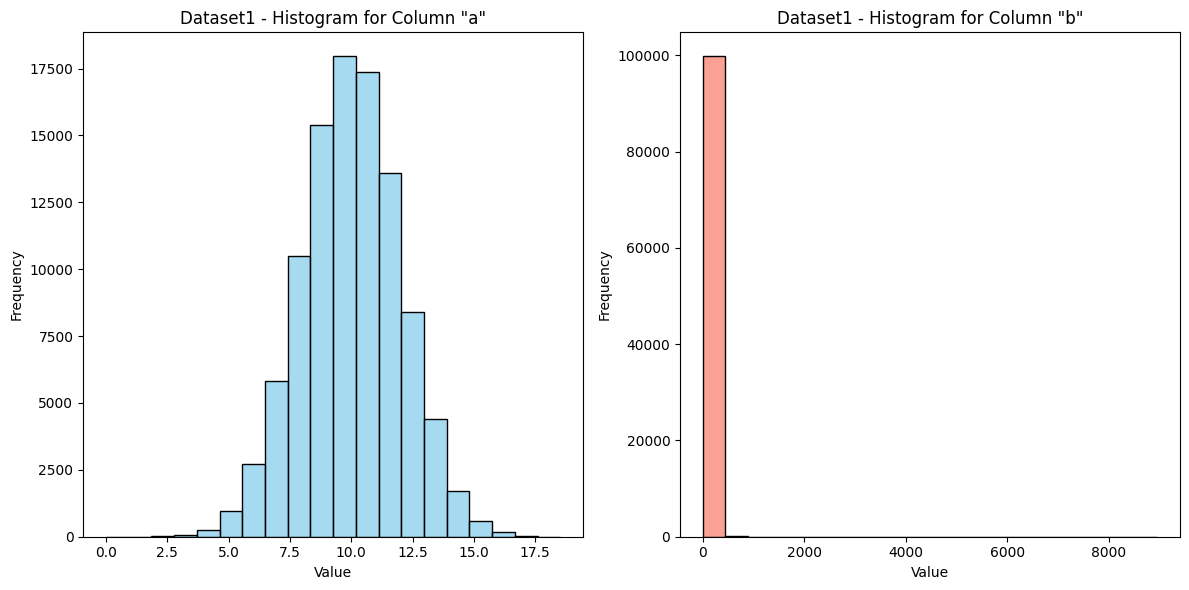

Observations for Dataset1:

For Column 'a':
Mean: 9.995579700000002
Standard Deviation: 2.0029398961601883

For Column 'b':
Mean: 10.0429071
Standard Deviation: 82.09586270473379

------------------------------------



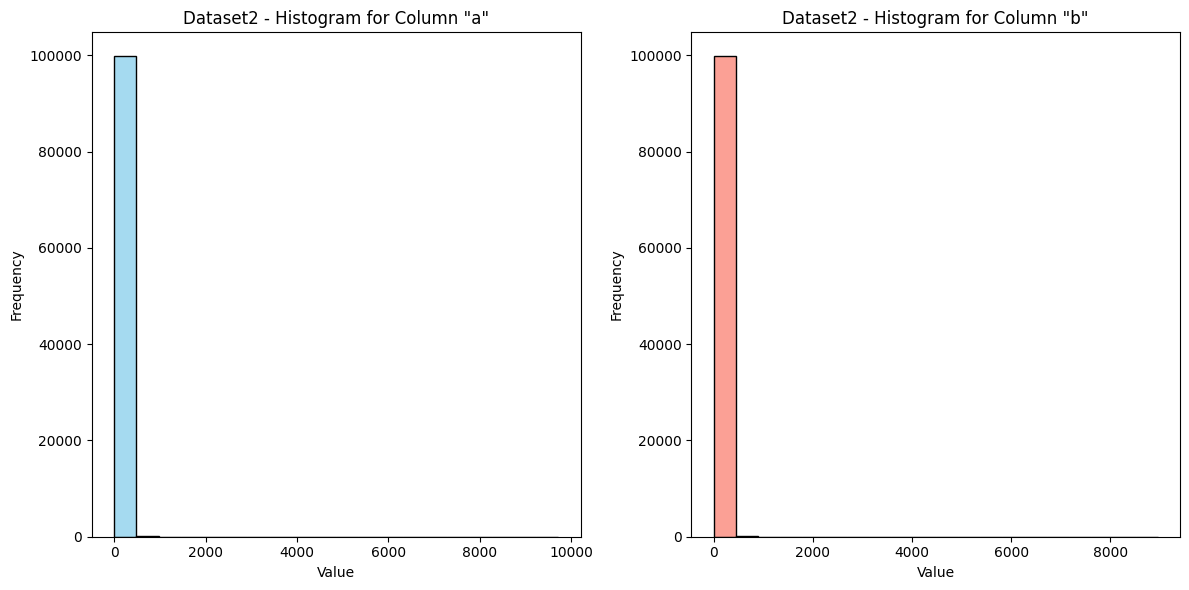

Observations for Dataset2:

For Column 'a':
Mean: 10.042174099999999
Standard Deviation: 79.2236897081195

For Column 'b':
Mean: 10.0429071
Standard Deviation: 82.09586270473379

------------------------------------



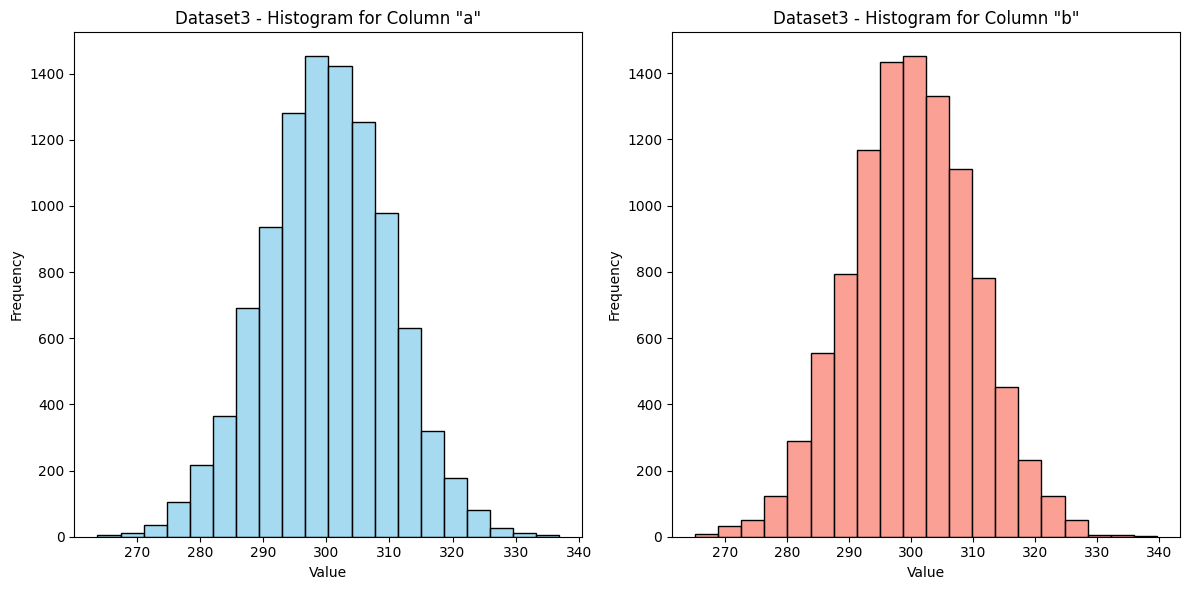

Observations for Dataset3:

For Column 'a':
Mean: 300.051019
Standard Deviation: 9.897145714849767

For Column 'b':
Mean: 300.054007
Standard Deviation: 9.958152151547914

------------------------------------



In [48]:
url_dataset1 = 'https://raw.githubusercontent.com/saimanikant62/Data-Visualization-HW1-/main/Dataset1.csv'
Dataset1 = pd.read_csv(url_dataset1)

url_dataset2 = 'https://raw.githubusercontent.com/saimanikant62/Data-Visualization-HW1-/main/Dataset2.csv'
Dataset2 = pd.read_csv(url_dataset2)

url_dataset3 = 'https://raw.githubusercontent.com/saimanikant62/Data-Visualization-HW1-/main/Dataset3.csv'
Dataset3 = pd.read_csv(url_dataset3)

datasets = [Dataset1, Dataset2, Dataset3]

# Summmary
for i, dataset in enumerate(datasets, 1):
    print(f"Summary Statistics for Dataset{i}:\n")
    print(dataset.describe())
    print("\n")

# Histograms
for i, dataset in enumerate(datasets, 1):
    plt.figure(figsize=(12, 6))

    # Histogram for column 'a'
    plt.subplot(1, 2, 1)
    sns.histplot(dataset['a'], bins=20, kde=False, color='skyblue')
    plt.title(f'Dataset{i} - Histogram for Column "a"')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    # Histogram for column 'b'
    plt.subplot(1, 2, 2)
    sns.histplot(dataset['b'], bins=20, kde=False, color='salmon')
    plt.title(f'Dataset{i} - Histogram for Column "b"')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


The summary statistics for dataset 1 has a small standard deviation of 2 for column a and 82 for column b. Dataset 2 has a standard deviation of 79 and mirrors datase 1's standard deviation for column b at 82. The third dataset has a consistent standard deviation for both columns, each rounding to 10. The mean itself rounds to 10 for both columns for dataset 1 and dataset 2. The mean sits at 300 for both columns for dataset 3. The dsitributions for the first dataset are spread out in bins with smaller increments in column a while column b focuses most of its data into the first bin. The second dataset has both columns focusing on the first bin encompassing majority of the values. The third one has a pretty centered distribution for both column centralized around the same area with values ranging from 263 to 339.
